# **Desafío: hora de la práctica**

Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

1 - La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

2 - Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

3 - Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

## Realizando la lectura de los datos

In [1]:
import pandas as pd

In [ ]:
datos = pd.read_csv('../data/churn.csv')

In [3]:
datos.head()

,id_cliente,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,15634602,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Podemos identificar que la base de datos tiene 10,000 registros y que en cada una de las columnas hay 10,000 registros no nulos. Esto es un buen indicativo de que nuestra base de datos no necesitará ningún tratamiento en ese sentido.

## Borrar la columna 'id_cliente'

In [5]:
datos.drop(columns=['id_cliente'], inplace=True)

In [6]:
datos.columns

Index(['score_credito', 'pais', 'sexo_biologico', 'edad', 'años_de_cliente',
       'saldo', 'servicios_adquiridos', 'tiene_tarjeta_credito',
       'miembro_activo', 'salario_estimado', 'churn'],
      dtype='object')

## Variables categoricas

Para realizar el análisis exploratorio, primero necesitamos identificar cuáles son las variables numéricas y cuáles son las categóricas, y también identificar la variable objetivo. Las variables categóricas son aquellas que presentan categorías distintas, generalmente en formato de texto.

La base de datos tiene 5 columnas categóricas, que son: `pais`, `sexo_biologico`, `tiene_tarjeta_credito`, `miembro_activo` y `churn`, siendo esta última la variable objetivo. Las demás son columnas con datos numéricos.

Vamos a utilizar gráficos de barras para contar cada categoría para cada una de las columnas usando la biblioteca `plotly`, comenzando con la variable objetivo `churn`. Primero es necesario importar la biblioteca y luego usar la función `histogram` para generar el gráfico:

In [7]:
import plotly.express as px

In [8]:
px.histogram(datos, x = 'churn', text_auto=True, color='churn', barmode='group')

Los demás gráficos de las variables categóricas pueden ser creados con una diferenciación de color para cada categoría de churn, podemos usar los parámetros `color = 'churn'` y `barmode = 'group'` para realizar esta tarea.

In [9]:
px.histogram(datos, x='sexo_biologico', text_auto=True, color='churn', barmode='group')

In [10]:
px.histogram(datos, x='pais', text_auto=True, color='churn', barmode='group')

In [11]:
px.histogram(datos, x='tiene_tarjeta_credito', text_auto=True, color='churn', barmode='group')

In [12]:
px.histogram(datos, x='miembro_activo', text_auto=True, color='churn', barmode='group')

## Variables numéricas

El resto del análisis exploratorio se realizará con las 6 columnas numéricas: `score_credito`, `edad`, `años_de_cliente`, `saldo`, `servicios_adquiridos` y `salario_estimado`. Podemos utilizar el boxplot para generar los gráficos de distribución de estas variables con la función `box`, usando el parámetro `color = 'churn'` para dividir por color según las categorías de la variable objetivo.

In [13]:
px.box(datos, x='edad', color='churn')

In [14]:
px.box(datos, x='saldo', color='churn')

In [15]:
px.box(datos, x='salario_estimado', color='churn')

In [16]:
px.box(datos, x='score_credito', color='churn')

In [17]:
px.box(datos, x='años_de_cliente', color='churn')

In [18]:
px.box(datos, x = 'servicios_adquiridos', color = 'churn')

# **Desafío 2: hora de la práctica**

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

1 - Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable `X` y la variable objetivo en `y`.

2 - Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de **Machine Learning**. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el **OneHotEncoder**, utilizando el parámetro `drop='if_binary'` si alguna variable tiene solo 2 categorías.

3 - La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método **LabelEncoder** para realizar la transformación de la variable `churn`.

La búsqueda de la solución a cualquier desafío comienza con la exploración y comprensión profunda del problema. Tómate un tiempo para comprender la necesidad de cada cuestión y desarrolla, con base en tu aprendizaje, las posibles soluciones.

In [19]:
datos

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64,0
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77,0
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52,1


1 - Para hacer la separación de los datos entre variables explicativas y variable objetivo, necesitamos detectar cuáles columnas formarán parte de cada uno de estos conjuntos de datos. La variable objetivo es la columna `churn`. Las variables explicativas son las demás columnas, que explicarán el comportamiento de la variable objetivo.

Para almacenar la columna `churn` en `y`, podemos usar la selección de columnas de la biblioteca pandas. Lo mismo se puede hacer para seleccionar las columnas en `X`, sin embargo, de forma más simple, podemos usar el método drop para eliminar la columna `churn` y almacenar todo lo demás en `X`:

In [20]:
X = datos.drop('churn', axis = 1)
y = datos['churn'] 

¡Listo! Ahora tenemos la separación de las variables para indicar al modelo cuál es la respuesta y cuáles son las columnas que explican esa respuesta.

2 - Para realizar la transformación de las variables categóricas, primero necesitamos identificar cuáles son las columnas que requieren este tipo de transformación.

En la base de datos de churn, las columnas categóricas son:

- **pais:** 3 categorías
- **sexo_biologico:** 2 categorías
- **tiene_tarjeta_credito:** 2 categorías
- **miembro_activo:** 2 categorías

La columna país necesita pasar por una transformación para que al final se generen 3 columnas, una para cada país distinto. Cada columna indicará con 0 si el registro no es del respectivo país y 1 si lo es. Como las demás columnas solo necesitan cambiar los valores de las dos categorías a 0 y 1, podemos usar el parámetro `drop = 'if_binary'` para que al final del proceso se elimine una de las columnas generadas y se mantenga solo una.

Vamos a importar las funciones y usar el método `make_column_transformer` para indicar cuáles son las columnas que necesitan el tratamiento de datos y cuáles no:

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder 

In [22]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

Para visualizar mejor los datos transformados, podemos almacenar el nombre de las columnas originales para obtener el nombre de las columnas después de la transformación. Luego de esto, usaremos el método `fit_transform` para realizar la transformación y visualizar los datos en un DataFrame:

In [23]:
columnas = X.columns 

In [24]:
X = one_hot.fit_transform(X)

Resultado en el nombre de las columnas transformadas:

In [25]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

Resultado de las 5 primeras filas del DataFrame:

In [26]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__sexo_biologico_Mujer,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


3 - Después de transformar las variables explicativas, queda transformar la variable objetivo. Vamos a utilizar el `LabelEncoder`, que es el método recomendado para esta tarea. El proceso para utilizar este método es bastante simple. Primero tenemos que importar la función, luego inicializar en una variable y, por último, usar el método `fit_transform` en los datos y:

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder = LabelEncoder()

In [29]:
y = label_encoder.fit_transform(y)

In [30]:
y

array([1, 0, 1, ..., 1, 1, 0], shape=(10000,))

# **Desafío: hora de la práctica**

1 - La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

2 - Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el `DummyClassifier` y encuentra la tasa de acierto con el método `score`.

3 - El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro `max_depth=4`, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método `plot_tree`.

Para desarrollar este desafío, dedica un tiempo a reflexionar y explorar. Analiza cuidadosamente los datos y las instrucciones de los enunciados de cada pregunta.

## Dividiendo los datos entre entrenamiento y prueba

Para separar el conjunto de datos entre entrenamiento y prueba, necesitamos utilizar el método `train_test_split` de la biblioteca *Scikit-Learn*.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

## Modelo de referencia - Baseline

Con los datos separados entre entrenamiento y prueba, podemos generar el modelo base con el `DummyClassifier` a partir de los datos de entrenamiento.

In [33]:
from sklearn.dummy import DummyClassifier

In [34]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7964

## Árboles de Decisión

Para construir un modelo de árbol de decisión, necesitamos los mismos pasos que el modelo base. Debemos importar la función, inicializar el modelo, hacer el ajuste del modelo en los datos de entrenamiento y, por último, evaluar el desempeño en los datos de prueba.

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arbol = DecisionTreeClassifier(random_state=5, max_depth=4)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [37]:
arbol.score(X_test, y_test)

0.8464

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

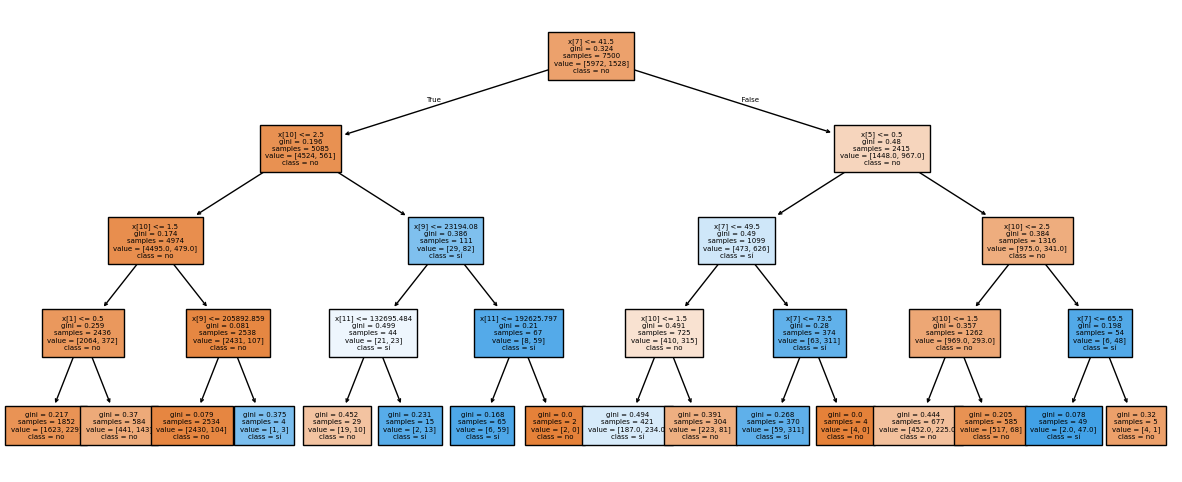

In [39]:
plt.figure(figsize=(15, 6))
plot_tree(arbol, filled=True, class_names=['no', 'sí'], fontsize=5);

In [40]:
arbol.score(X_train, y_train)

0.8509333333333333

# **Desafío: hora de la práctica**

1 - La normalización de datos es una tarea importante para mantener todos los valores numéricos en una misma escala y garantizar que todas las características tengan el mismo impacto en el modelo. En esta tarea, realiza la normalización de la base de datos usando el `MinMaxScaler`.

2 - Con los datos normalizados, podemos utilizar el modelo KNN, que hace cálculos de distancia para encontrar los vecinos más cercanos. En esta actividad, crea un modelo KNN usando el [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) con los datos normalizados y evalúa el rendimiento en los datos de prueba, también normalizados.

3 - Después de construir los modelos, es el momento de comparar los resultados y seleccionar aquel que tiene el mejor rendimiento. En este desafío, evalúa la tasa de acierto de los modelos `DummyClassifier`, `DecisionTreeClassifier` y `KNeighborsClassifier` que fueron construidos en los otros desafíos utilizando el método `score` y, a continuación, almacena el modelo con mejor precisión en un archivo **pickle**. Los modelos de transformación también necesitan ser almacenados, que es el caso del *OneHotEncoder* y del *MinMaxScaler*, en caso de que el KNN tenga el mejor rendimiento.

4 - Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos. En este desafío, realiza la lectura de los archivos **pickle** de los modelos que fueron guardados en el desafío anterior y utiliza los modelos para hacer la predicción del siguiente registro:

```py
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro _activo': [1],
    'salario_estimado': [85270.00]
})
```

Recuerda que la práctica es fundamental para mejorar tus habilidades en Machine Learning.

1 - Para hacer la normalización de los datos, vamos a utilizar el método *MinMaxScaler*. Primero, importamos la función y luego hacemos la transformación de los datos de entrenamiento de las variables explicativas, almacenando en una nueva variable `x_entrenamiento_normalizado`:

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

Si queremos visualizar el resultado de la transformación, podemos utilizar el método *pd.DataFrame* para generar una tabla con los datos:

In [43]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,0.0,1.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,1.0,0.0,0.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,1.0,0.0,0.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,1.0,0.0,1.0,0.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,1.0,0.0,1.0,0.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,1.0,0.0,1.0,0.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,1.0,0.0,0.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


2 - Con los datos normalizados, podemos generar el modelo de vecinos más cercanos con el `KNeighborsClassifier` a partir de los datos de entrenamiento normalizados. Primero, importamos la función:

In [44]:
from sklearn.neighbors import KNeighborsClassifier

Ahora inicializamos el modelo y hacemos el ajuste con los datos de entrenamiento normalizados. Por último, podemos normalizar los datos de prueba y usar el método `score` para evaluar el rendimiento:

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

X_test_normalizado = normalizacion.transform(X_test)

knn.score(X_test_normalizado, y_test)

0.8172

3 - Para comparar los resultados de los modelos creados en los desafíos, vamos a usar el método `score` con los datos de prueba, para tener un comparactivo en la misma celda:

In [46]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}') 

Exactitud Dummy: 0.7964
Exactitud Árbol: 0.8464
Exactitud KNN: 0.8172


El modelo de árbol de decisión, en este caso, se desempeñó mejor y, por lo tanto, será el modelo seleccionado. Vamos a utilizar *pickle* para almacenar el modelo de árbol y también el modelo OneHotEncoder, que realiza las transformaciones de las variables categóricas. Primero, debemos importar la biblioteca *pickle* y luego hacer la exportación de los archivos:

In [47]:
import pickle 

In [ ]:
with open('../mod/modelo_onehotenc.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [ ]:
with open('../mod/modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(arbol, archivo)

4 - Para hacer la predicción de un nuevo dato, primero vamos a crear una variable que almacene la información de este registro, que fue proporcionado en el enunciado del desafío:

In [50]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
}) 

In [51]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,850,Francia,Hombre,27,3,56000,1,1,1,85270.0


Ahora, podemos hacer la lectura de los archivos pickle usando la función pd.read_pickle de pandas:

In [ ]:
modelo_one_hot = pd.read_pickle('../mod/modelo_onehotenc.pkl')
modelo_arbol = pd.read_pickle('../mod/modelo_arbol.pkl') 

Por último, podemos usar el modelo_one_hot para hacer la transformación del nuevo dato y, a continuación, usar ese resultado para hacer la predicción con el modelo_arbol:

In [53]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato) 

array([0])

Esto indica que la predicción fue el valor 0, que indica que no habrá churn. Por lo tanto, el cliente no dejará de utilizar los servicios.